# Import Libraries


In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [20]:
df = pd.read_excel("Datasets/label.xlsx")

In [21]:
for i in df.columns:
    if i.split('_')[-1] == 'z':
        df.drop(i, axis=1, inplace=True)

In [22]:
df

,Left_Shoulder_Angle,Right_Shoulder_Angle,Left_Elbow_Angle,Right_Elbow_Angle,Left_Wrist_Angle,Right_Wrist_Angle,Left_Hip_Angle,Right_Hip_Angle,Left_Knee_Angle,Right_Knee_Angle,Neck_Angle,Left_Ankle_Angle,Right_Ankle_Angle,Left_Heel_Angle,Right_Heel_Angle,Left_Foot_Index_Angle,Right_Foot_Index_Angle,Label
0,57.560364,8.905739,198.021898,210.802643,8.860333,10.509499,179.419460,187.092761,199.960568,196.612153,21.390257,199.148075,228.415769,62.046980,47.821461,345.410901,351.451797,1
1,58.804796,17.938139,240.444772,210.085147,53.923432,11.986242,174.497594,180.617447,204.319900,197.359277,353.600885,234.996271,230.088818,8.541182,42.411217,358.479579,351.599064,1
2,66.340221,16.929885,172.669875,209.001619,356.941629,12.917519,180.594488,182.194824,198.669814,202.165259,350.094691,223.538704,226.527556,15.398690,41.522153,356.612888,350.644648,1
3,62.771507,15.692037,179.324908,210.541627,359.722534,14.138074,180.384054,185.222696,198.466275,199.438819,341.668137,220.749473,229.690630,28.832056,35.758201,352.854062,351.330772,1
4,63.730818,15.318916,178.679337,213.506587,359.484738,15.763071,182.602836,185.197565,195.977440,199.155724,335.033822,219.384314,234.136778,32.564104,30.664314,351.383632,351.751616,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,280.680896,292.016860,164.577559,158.557485,352.036182,349.007952,205.564799,195.861149,8.090131,41.276471,5.332004,216.380596,185.418408,50.891105,109.581369,335.315142,344.179169,0
934,279.185951,291.211051,166.283222,159.335746,352.872827,349.473293,204.647761,195.212799,4.108663,31.429036,6.263176,218.133341,175.210468,56.098051,131.306809,335.188243,345.415740,0
935,278.461514,290.023536,166.921981,160.350314,353.189310,349.986958,204.557361,195.175844,1.920668,30.951483,5.788952,219.446842,181.288482,54.932039,120.592202,335.674160,343.823365,0
936,277.812178,289.035389,167.454265,160.703909,353.440398,350.182115,204.525862,195.123591,358.691762,32.363058,5.868439,221.156997,192.443359,55.087518,98.631934,336.547630,343.316911,0


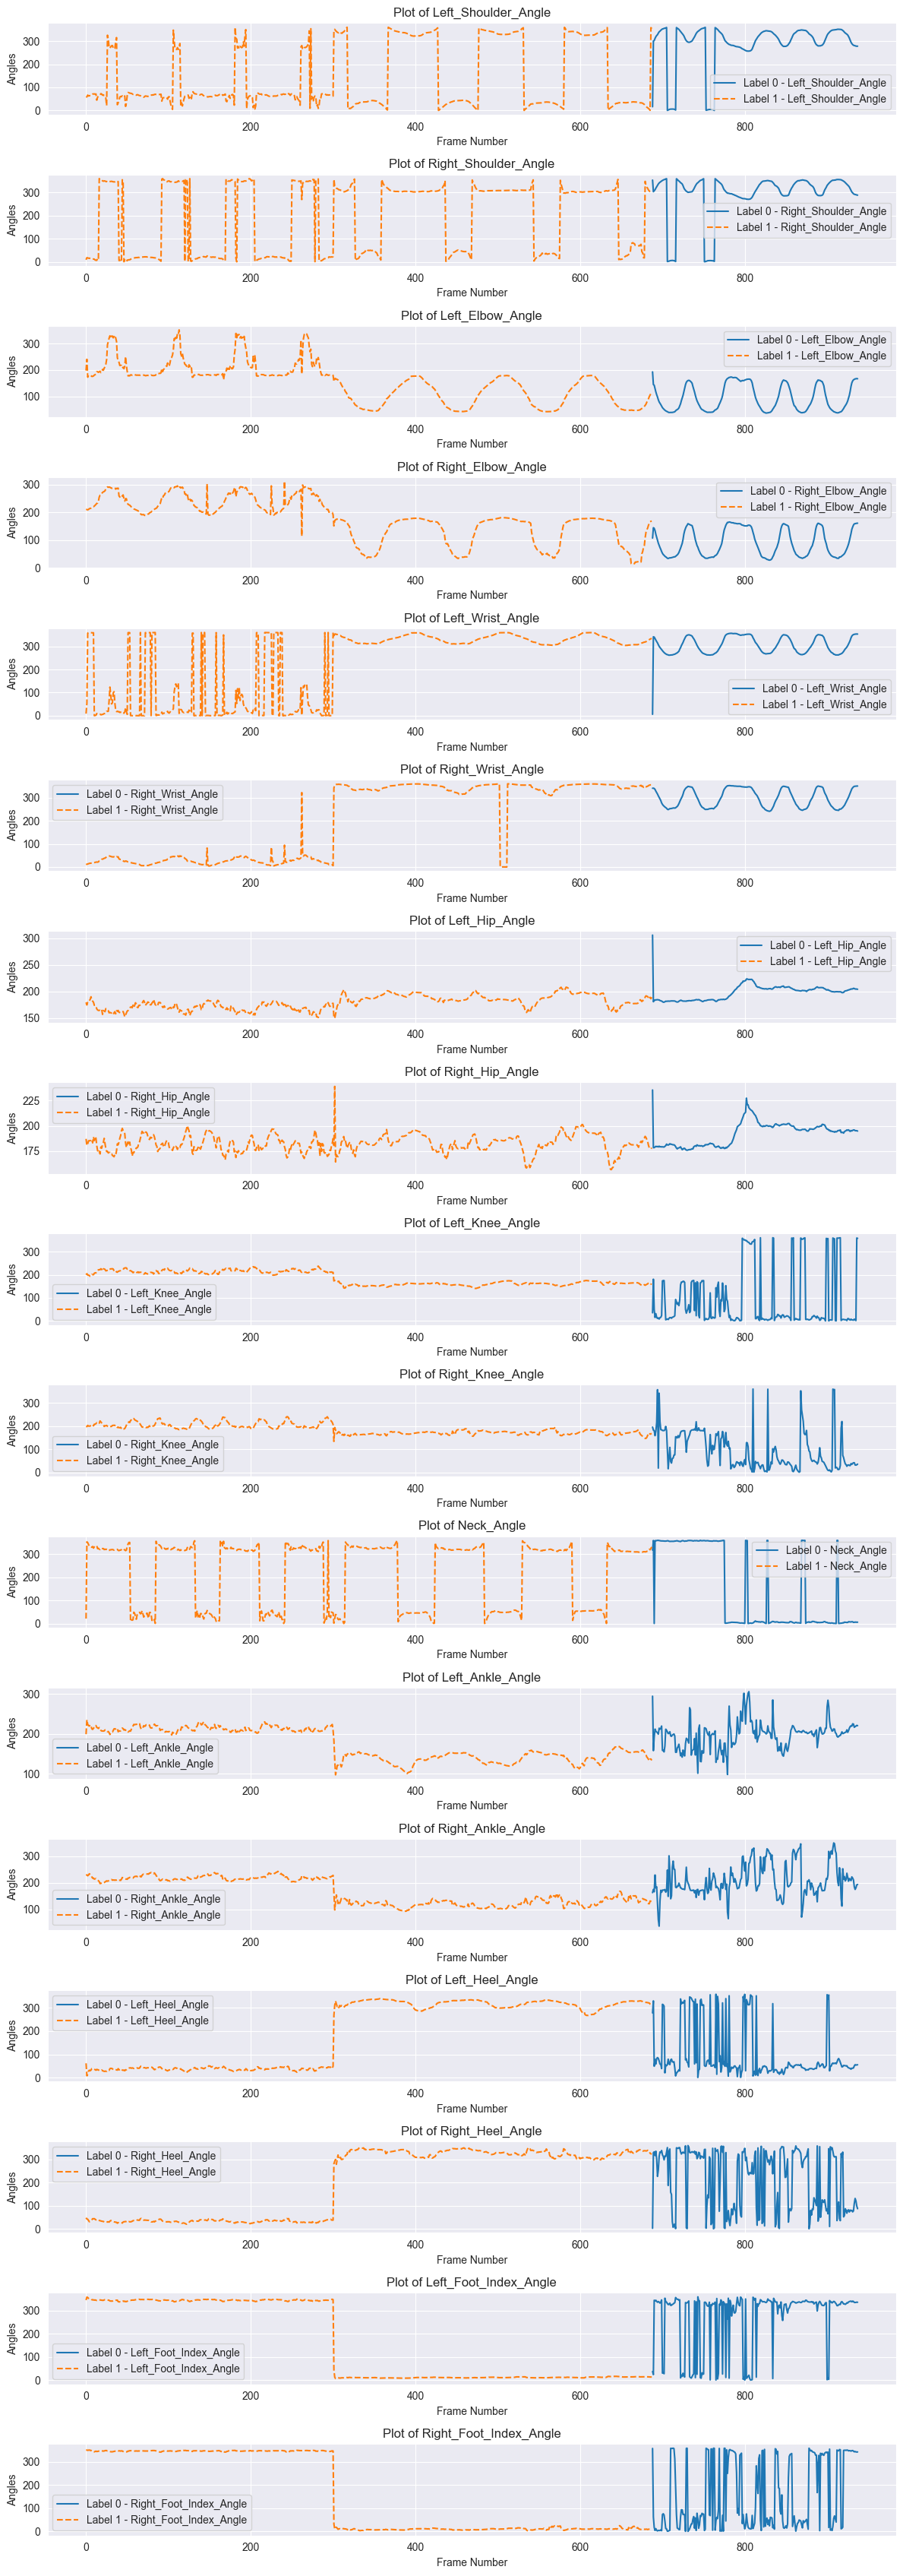

In [23]:
# Filter the dataset for label 0 and label 1
label_0_data = df[df['Label'] == 0]
label_1_data = df[df['Label'] == 1]

# Plot each angle in a separate subplot
num_angles = len(df.columns) - 1  # Exclude 'Label'
fig, axes = plt.subplots(nrows=num_angles, ncols=1, figsize=(12, 2 * num_angles))

for i, column in enumerate(df.columns):
    if column not in ['Label']:
        ax = axes[i] if num_angles > 1 else axes  # Select the appropriate subplot
        ax.plot(label_0_data.index, label_0_data[column], label=f'Label 0 - {column}')
        ax.plot(label_1_data.index, label_1_data[column], label=f'Label 1 - {column}', linestyle='--')
        ax.set_xlabel('Frame Number')
        ax.set_ylabel('Angles')
        ax.set_title(f'Plot of {column}')
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()